In [1]:
import sys
sys.path.append("../utils")
import utils as ut
import numpy as np
from rich import print as print_rich

# PROBLEMA 2

Para la siguiente estructura, hallar la matriz de rigidez global de cada barra. 

Considerar:
* $Área = 625 \quad cm^2$
* $E = 21000 \quad kN/cm^2$

Coordenadas:
* $A = (0, 0)$
* $B = (3, 0)$
* $C = (6, 0)$
* $D = (1.5, 1)$
* $E = (3, 2)$
* $F = (4.5, 1)$

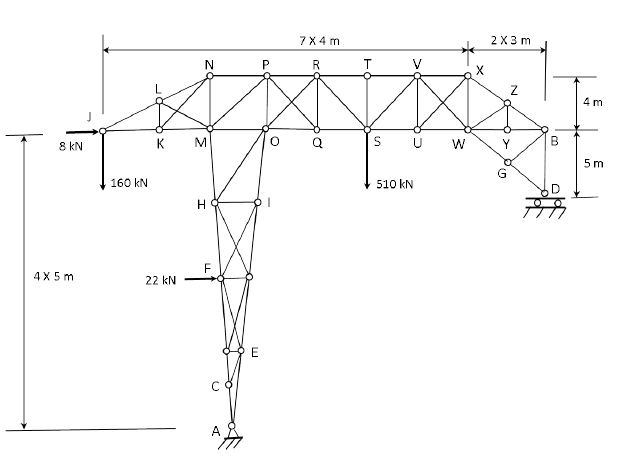

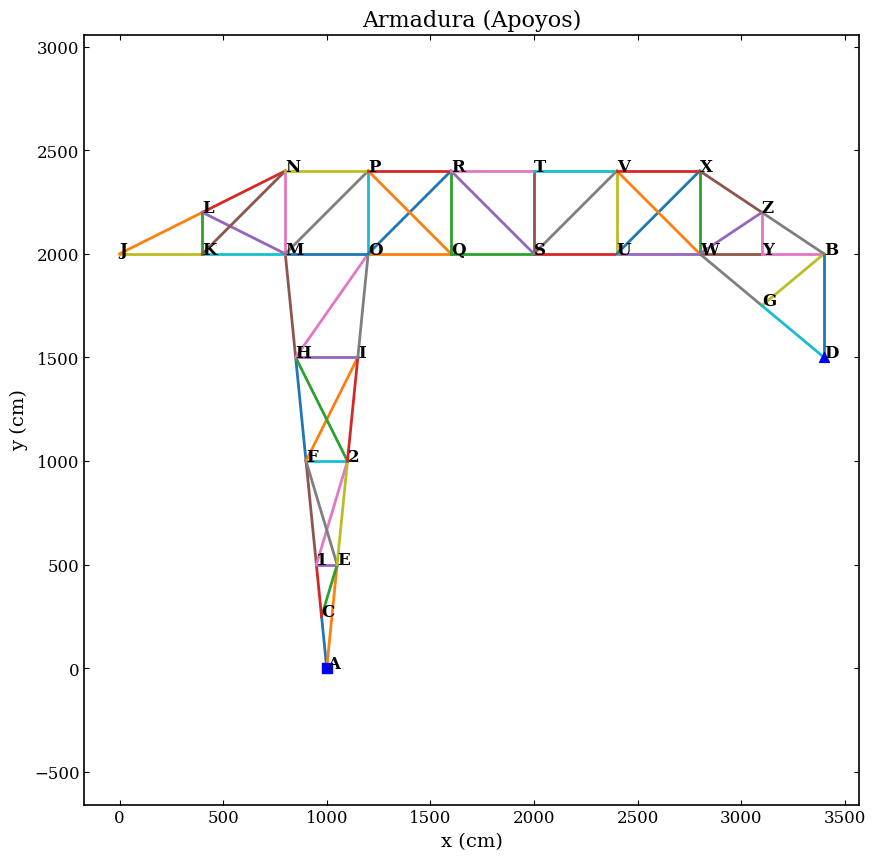

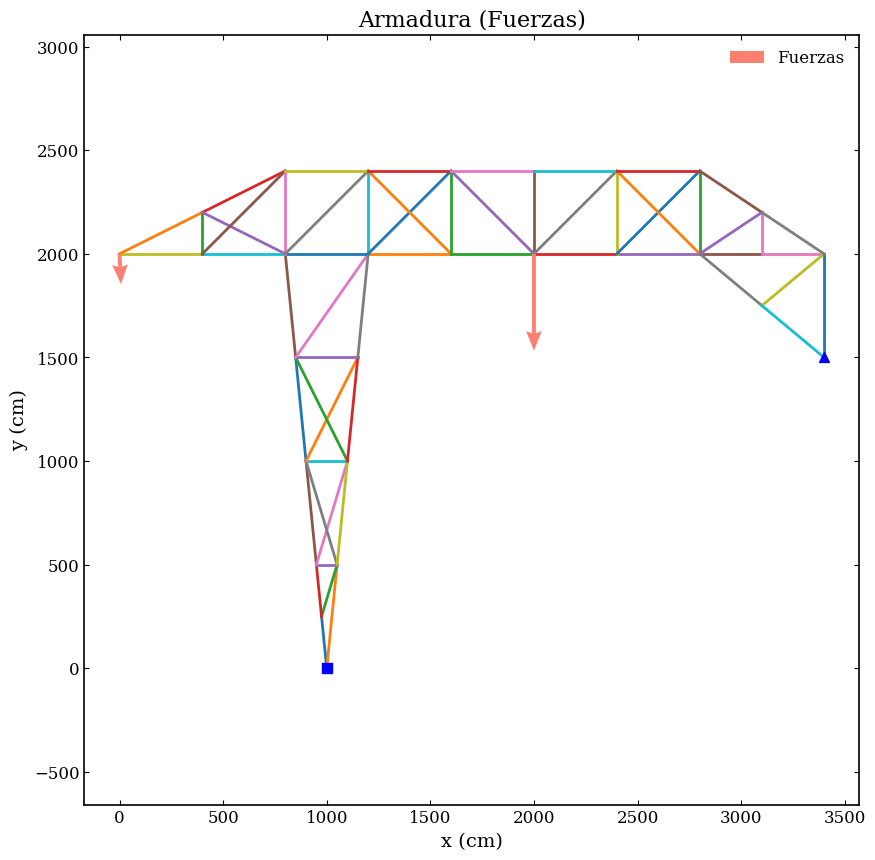

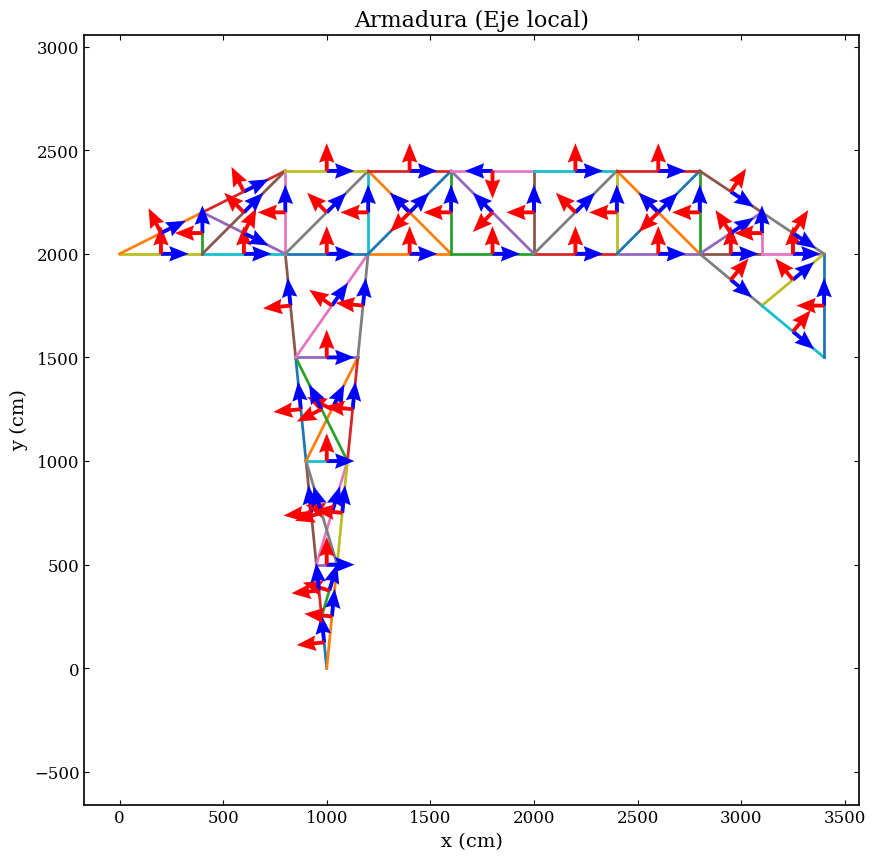

In [ ]:
#Propiedades
A = 625  #cm^2
E = 21_000 #kN/cm^2

und_long = "cm"
und_fuer = "kN"


# Coordenadas (OJO LOS NODOS DEBEN SER STRING LO MISMO PARA LOS NODOS DE LAS BARRAS)
coords = {  "A":[(4*2+2)*100, 0],
            "B":[(7*4+2*3)*100, 4*5*100],
            "C":[(4*2+1.75)*100, 2.5*100],
            "D":[(7*4+2*3)*100, 3*5*100],
            "E":[(2.5+2*4)*100, 500],
            "F":[(2*4+1)*100, 2*5*100],
            "G":[(7*4+3)*100, (3*5+2.5)*100],
            "H":[(2*4+0.5)*100, 3*5*100],
            "I":[(3*4-0.5)*100, 3*5*100],
            "J":[0, 4*5*100],
            "K":[4*100, 4*5*100],
            "L":[4*100, (4*5+2)*100],
            "M":[2*4*100, 4*5*100],
            "N":[2*4*100, (4*5+4)*100],
            "O":[3*4*100, 4*5*100],
            "P":[3*4*100, (4*5+4)*100],
            "Q":[4*4*100, 4*5*100],
            "R":[4*4*100, (4*5+4)*100],
            "S":[5*4*100, 4*5*100],
            "T":[5*4*100, (4*5+4)*100],
            "U":[6*4*100, 4*5*100],
            "V":[6*4*100, (4*5+4)*100],
            "W":[7*4*100, 4*5*100],
            "X":[7*4*100, (4*5+4)*100],
            "Y":[(7*4+3)*100, 4*5*100],
            "Z":[(7*4+3)*100, (4*5+2)*100],
            "1":[(2*4+1.5)*100, 5*100],
            "2":[(3*4-1)*100, 5*2*100]
        }

barras = [["A", "C", A, E], 
          ["A", "E", A, E], 
          ["C", "E", A, E], 
          ["C", "1", A, E],
          ["1", "E", A, E], 
          ["1", "F", A, E],
          ["1", "2", A, E],
          ["E", "F", A, E],
          ["E", "2", A, E],
          ["F", "2", A, E],
          ["F", "H", A, E],
          ["F", "I", A, E],
          ["2", "H", A, E],
          ["2", "I", A, E],
          ["H", "I", A, E],
          ["H", "M", A, E],
          ["H", "O", A, E],
          ["I", "O", A, E],
          ["J", "K", A, E],
          ["K", "M", A, E],
          ["M", "O", A, E],
          ["O", "Q", A, E],
          ["Q", "S", A, E],
          ["S", "U", A, E],
          ["U", "W", A, E],
          ["W", "Y", A, E],
          ["Y", "B", A, E],
          ["W", "G", A, E],
          ["G", "B", A, E],
          ["G", "D", A, E],
          ["D", "B", A, E],
          ["J", "L", A, E],
          ["K", "L", A, E],
          ["L", "N", A, E],
          ["L", "M", A, E],
          ["K", "N", A, E],
          ["M", "N", A, E],
          ["M", "P", A, E],
          ["N", "P", A, E],
          ["O", "P", A, E],
          ["O", "R", A, E],
          ["Q", "P", A, E],
          ["Q", "R", A, E],
          ["P", "R", A, E],
          ["S", "R", A, E],
          ["S", "T", A, E],
          ["T", "R", A, E],
          ["S", "V", A, E],
          ["U", "V", A, E],
          ["T", "V", A, E],
          ["U", "X", A, E],
          ["W", "V", A, E],
          ["W", "X", A, E],
          ["V", "X", A, E],
          ["W", "Z", A, E],
          ["X", "Z", A, E],
          ["Y", "Z", A, E],
          ["Z", "B", A, E]
          ]

# Verificar barras duplicadas
for i, j, _, _ in barras:
        ij=i+j
        ji=j+i
        contador = 0 # contador de elementos duplicados, si llega a dos significa que hay un elemento duplicado
        for m, n, _, _ in barras:
                mn=m+n
                if mn == ij or mn == ji:
                        contador += 1
                if contador == 2:
                        print(f"Elemento duplicado: {ij}")

# Fuerzas
Fuerzas = {"J":[8, -160],
           "F":[22, 0],
           "S":[0, -510]}

# Restricciones [0 = x , 1 = y, 2 = [x, y]]
restricciones = {"A": 2,
                 "D": 1}

ut.grafico_t0(coords, barras, restricciones, Fuerzas,"Armadura (Apoyos)", f"x ({und_long})", f"y ({und_long})", True, False, True, False, None,(10,10))  #View(Nodo, Fuerza, Apoyo, Eje local)
ut.grafico_t0(coords, barras, restricciones, Fuerzas,"Armadura (Fuerzas)", f"x ({und_long})", f"y ({und_long})", False, True, True, False, None,(10,10))
ut.grafico_t0(coords, barras, restricciones, Fuerzas,"Armadura (Eje local)", f"x ({und_long})", f"y ({und_long})", False, False, False, True, escala_ejes_l=28, tamaño_fig=(10,10))

# Matriz de rigiz de cada elemento
Matriz de rigidez de cada barra en coordenadas locales y globales.

In [3]:
# Diccionario de Matriz c. local
matriz_local = {}

# Diccionario de Matriz en c. global
matriz_global = {}


for i, f, As, Es in barras:
    xi, yi = coords[i]
    xf, yf = coords[f]
    kl, kg=ut.matriz_rigidez(As, Es, xi, xf, yi, yf)

    nombre = (i , f)

    matriz_local[nombre] = kl
    matriz_global[nombre] = kg



Locales

In [4]:
for j,i in enumerate(matriz_local):
    ut.matriz_print_latex(j+1, matriz_local[i], "Local", i, 3)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Globales

In [5]:
for j, i in enumerate(matriz_global):
    ut.matriz_print_latex(j+1, matriz_global[i], "Global", i, 3)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Grados de libertad de cada barra

In [6]:
# Nodos Nombres
nodos_name = list(coords.keys())
dict_GDL = matriz_global.copy()

for j, i in enumerate(matriz_global):
    lista_temporal = list(i)

    # Posicionamiento
    Posicionamiento = [nodos_name.index(item) for item in lista_temporal]

    # Grados de Libertad Correspondientes
    grados_libertad_corr = [ Posicionamiento[0]*2, Posicionamiento[0]*2+1, Posicionamiento[1]*2, Posicionamiento[1]*2+1 ]
    dict_GDL[i] = grados_libertad_corr

    #Print
    ut.matriz_print_latex(j+1, grados_libertad_corr, "GDL", "", 0, i)

    

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# GDL Restricciones

In [7]:
# Lista de GDL Restringidos
restricciones_GDL = []

for i in restricciones:
    # Posicionamiento de nodo restringido
    pos_res = nodos_name.index(i)

    # Condicción de apoyo
    grados_libertad_corr = []
    if restricciones[i] == 0 or restricciones[i] == 2:
        grados_libertad_corr.append(pos_res*2)
    if restricciones[i] == 1 or restricciones[i] == 2:
        grados_libertad_corr.append(pos_res*2+1)

    restricciones_GDL.extend(grados_libertad_corr) 

# Print
ut.matriz_print_latex("A", restricciones_GDL, "GDL","", 0, "Restringidos")   

<IPython.core.display.Math object>

# Ensamblando Matriz de rigidez Global del sistema

In [8]:
k_sistema = ut.esambladora(coords, matriz_global, dict_GDL)

ut.matriz_print_latex("A", k_sistema, "K", "", 2,"Sistema")

<IPython.core.display.Math object>

# Vector de fuerzas aplicadas y sus GDL

In [9]:
GDL_fuerzas_aplicadas = []
Vector_fuerzas = np.zeros((len(coords)*2))
for f in Fuerzas:
    nodo_pos = nodos_name.index(f)
    GDL_nodo_temp = [nodo_pos*2, nodo_pos*2+1]
    GDL_fuerzas_aplicadas.extend(GDL_nodo_temp)
    Vector_fuerzas[GDL_nodo_temp] = Fuerzas[f]

ut.matriz_print_latex("A", Vector_fuerzas[GDL_fuerzas_aplicadas], "F", "", 2,"Aplicadas")
ut.matriz_print_latex("B", GDL_fuerzas_aplicadas, "F", "", 0,"GDL")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Grados de libertad

In [10]:
GDL_total = np.arange(len(coords)*2)
GDL_libres = np.setdiff1d(GDL_total, restricciones_GDL)

# Matriz de rigidez Global del sistema Libres

In [11]:
rango_libres_k = np.ix_(GDL_libres, GDL_libres)
ut.matriz_print_latex("A", k_sistema[rango_libres_k], "K", "", 2, "Sistema \\quad Libre")

<IPython.core.display.Math object>

# CALCULO DE DESPLAMIENTOS

Por Hooke:

* $K_{global} \cdot \Delta u = F_{global}$
* $k_{libres} \cdot \Delta u_{libres} = F_{libres}$



In [12]:
# Hooke
u_desp = np.zeros((len(coords)*2))

u_desp[GDL_libres] = Vector_fuerzas[GDL_libres].T @ np.linalg.inv(k_sistema[rango_libres_k])

In [13]:
dict_despl = {}
for n, i in enumerate(nodos_name):
    GDL_inv = np.ix_([n*2, n*2+1])
    dict_despl[i] = u_desp[GDL_inv]

print(f"Desplazamientos Nodales ({und_long}):")
print_rich(dict_despl)

Desplazamientos Nodales (cm):


{
    'A': array([0., 0.]),
    'B': array([ 0.50499414, -0.00615873]),
    'C': array([0.10758765, 0.00294459]),
    'D': array([0.58694211, 0.        ]),
    'E': array([ 0.19624405, -0.02365233]),
    'F': array([0.30456975, 0.00374741]),
    'G': array([ 0.54340199, -0.05224815]),
    'H': array([0.38397405, 0.00067107]),
    'I': array([ 0.38506443, -0.04284932]),
    'J': array([ 0.48660691, -0.05488021]),
    'K': array([0.47661072, 0.00435992]),
    'L': array([0.47065673, 0.00427888]),
    'M': array([ 0.46645245, -0.0045827 ]),
    'N': array([ 0.49096899, -0.00953993]),
    'O': array([ 0.46328547, -0.05611718]),
    'P': array([ 0.50072138, -0.05515773]),
    'Q': array([ 0.46510842, -0.10436303]),
    'R': array([ 0.49990306, -0.10916865]),
    'S': array([ 0.47173699, -0.16736093]),
    'T': array([ 0.48265861, -0.16736093]),
    'U': array([ 0.48405445, -0.144639  ]),
    'V': array([ 0.46541417, -0.14710249]),
    'W': array([ 0.49390842, -0.11164043]),
    'X': array([ 0.4555602 , -0.10917694]),
    'Y': array([ 0.49945128, -0.07443069]),
    'Z': array([ 0.46910193, -0.07443069]),
    '1': array([0.19588567, 0.00396021]),
    '2': array([ 0.30568328, -0.03407703])
}

# Reacciones

In [14]:
Vector_fuerzas =  k_sistema @ u_desp.T

dict_vector_fuerzas = {}
for n, i in enumerate(nodos_name):
    GDL_inv = np.ix_([n*2, n*2+1])
    dict_vector_fuerzas[i] = Vector_fuerzas[GDL_inv]

print(f"Fuerzas en los Nodos ({und_fuer}):")
print_rich(dict_vector_fuerzas)

Fuerzas en los Nodos (kN):


{
    'A': array([-30.        , 508.33333333]),
    'B': array([ 1.62378910e-09, -2.64662958e-10]),
    'C': array([-4.70663508e-11, -8.95852281e-11]),
    'D': array([-1.34491529e-10,  1.61666667e+02]),
    'E': array([1.71004899e-09, 1.89174898e-10]),
    'F': array([ 2.2000000e+01, -1.8189894e-11]),
    'G': array([ 6.48014975e-12, -2.74894774e-10]),
    'H': array([-1.75475634e-10,  1.40516931e-10]),
    'I': array([4.08363121e-10, 8.69704309e-11]),
    'J': array([   8., -160.]),
    'K': array([-6.05098194e-11, -1.65812253e-10]),
    'L': array([1.10321707e-09, 6.26982910e-11]),
    'M': array([-6.26869223e-10,  2.50111043e-10]),
    'N': array([9.77138370e-11, 1.69393388e-11]),
    'O': array([-1.16597221e-09, -4.42014425e-10]),
    'P': array([-9.43600753e-11,  2.72823542e-10]),
    'Q': array([ 1.06865627e-09, -2.10093276e-10]),
    'R': array([-1.16870069e-09,  2.93411517e-10]),
    'S': array([-7.92965693e-11, -5.10000000e+02]),
    'T': array([8.69212424e-10, 0.00000000e+00]),
    'U': array([7.63975549e-11, 1.58252078e-10]),
    'V': array([1.43984380e-09, 7.49196261e-11]),
    'W': array([7.54369012e-10, 4.39740688e-10]),
    'X': array([-1.37117695e-09, -1.32786226e-10]),
    'Y': array([-1.30603439e-09,  0.00000000e+00]),
    'Z': array([-8.50832294e-10,  6.73026079e-11]),
    '1': array([-1.68000724e-09, -2.85353963e-11]),
    '2': array([-8.79055051e-10,  5.61612978e-11])
}

# Deformación Unitaria, Esfuerzos Internos y Fuerzas Normales

In [15]:
dict_def_unitaria = {}
dict_esfuerzo = {}
dict_normal = {}
for i, f, As, Es in barras:
    xi, yi = coords[i]
    xf, yf = coords[f]
    despl_temp = np.concatenate((dict_despl[i], dict_despl[f]))
    e_unitaria = ut.deformación_unitaria(xi, xf, yi, yf, despl_temp)
    dict_def_unitaria[i+f] = e_unitaria
    dict_esfuerzo[i+f] = Es*e_unitaria
    dict_normal[i+f] = As*Es*e_unitaria

print(f"Defomaciones unitarias en las barras ({und_long}/{und_long}):")
print_rich(dict_def_unitaria)

print(f"Esfuerzos en las barras ({und_fuer}/{und_long}^2):")
print_rich(dict_esfuerzo)

print(f"Normales en las barras ({und_fuer}):")
print_rich(dict_normal)



Defomaciones unitarias en las barras (cm/cm):


{
    'AC': np.float64(-3.094723603962864e-05),
    'AE': np.float64(-7.976091762805468e-06),
    'CE': np.float64(1.1162190441769767e-17),
    'C1': np.float64(-3.09472360396325e-05),
    '1E': np.float64(3.5838264071591233e-06),
    '1F': np.float64(-2.194298363004376e-05),
    '12': np.float64(-9.354061541031782e-06),
    'EF': np.float64(-9.354061541037053e-06),
    'E2': np.float64(1.0281606467823422e-06),
    'F2': np.float64(5.56763676332848e-06),
    'FH': np.float64(-2.1815393046378766e-05),
    'FI': np.float64(-1.0159041993445263e-05),
    '2H': np.float64(-7.0356454534499656e-06),
    '2I': np.float64(-1.65183307005296e-06),
    'HI': np.float64(3.634609357409025e-06),
    'HM': np.float64(-2.673585958887341e-05),
    'HO': np.float64(-1.7050426892059827e-06),
    'IO': np.float64(-1.0783676063314743e-05),
    'JK': np.float64(-2.4990476190478115e-05),
    'KM': np.float64(-2.5395670143532016e-05),
    'MO': np.float64(-7.917460317476103e-06),
    'OQ': np.float64(4.557377625661146e-06),
    'QS': np.float64(1.6571428571413927e-05),
    'SU': np.float64(3.079365079364496e-05),
    'UW': np.float64(2.463492063492485e-05),
    'WY': np.float64(1.847619047615324e-05),
    'YB': np.float64(1.8476190476252633e-05),
    'WG': np.float64(3.3460237352315664e-18),
    'GB': np.float64(1.6105640054659532e-17),
    'GD': np.float64(-1.3361358255197212e-17),
    'DB': np.float64(-1.231746031745845e-05),
    'JL': np.float64(2.725873344002961e-05),
    'KL': np.float64(-4.051939530461129e-07),
    'LN': np.float64(2.6805712828435803e-05),
    'LM': np.float64(4.530206114997533e-07),
    'KN': np.float64(5.730307838071443e-07),
    'MN': np.float64(-1.2393073167001654e-05),
    'MP': np.float64(-2.038263356560981e-05),
    'NP': np.float64(2.438095238093966e-05),
    'OP': np.float64(2.39864746687015e-06),
    'OR': np.float64(-2.054234520206781e-05),
    'QP': np.float64(1.699043378663948e-05),
    'QR': np.float64(-1.2014050945817915e-05),
    'PR': np.float64(-2.0457969775699353e-06),
    'SR': np.float64(3.7532778988716515e-05),
    'ST': np.float64(-6.541343830243692e-21),
    'TR': np.float64(-4.3111111111035e-05),
    'SV': np.float64(1.7419519434962294e-05),
    'UV': np.float64(-6.158730158726753e-06),
    'TV': np.float64(-4.311111111110122e-05),
    'UX': np.float64(8.709759717450447e-06),
    'WV': np.float64(-8.709759717486536e-06),
    'WX': np.float64(6.158730158727486e-06),
    'VX': np.float64(-2.4634920634997746e-05),
    'WZ': np.float64(-3.415606382038353e-17),
    'XZ': np.float64(-2.220561737903348e-05),
    'YZ': np.float64(-9.915404402632475e-21),
    'ZB': np.float64(-2.2205617378989747e-05)
}

Esfuerzos en las barras (kN/cm^2):


{
    'AC': np.float64(-0.6498919568322015),
    'AE': np.float64(-0.16749792701891483),
    'CE': np.float64(2.344059992771651e-13),
    'C1': np.float64(-0.6498919568322825),
    '1E': np.float64(0.0752603545503416),
    '1F': np.float64(-0.460802656230919),
    '12': np.float64(-0.19643529236166743),
    'EF': np.float64(-0.19643529236177812),
    'E2': np.float64(0.021591373582429185),
    'F2': np.float64(0.11692037202989808),
    'FH': np.float64(-0.4581232539739541),
    'FI': np.float64(-0.21333988186235053),
    '2H': np.float64(-0.14774855452244928),
    '2I': np.float64(-0.03468849447111216),
    'HI': np.float64(0.07632679650558952),
    'HM': np.float64(-0.5614530513663416),
    'HO': np.float64(-0.03580589647332564),
    'IO': np.float64(-0.2264571973296096),
    'JK': np.float64(-0.5248000000000405),
    'KM': np.float64(-0.5333090730141723),
    'MO': np.float64(-0.16626666666699816),
    'OQ': np.float64(0.09570493013888406),
    'QS': np.float64(0.34799999999969244),
    'SU': np.float64(0.6466666666665442),
    'UW': np.float64(0.5173333333334219),
    'WY': np.float64(0.387999999999218),
    'YB': np.float64(0.3880000000013053),
    'WG': np.float64(7.02664984398629e-14),
    'GB': np.float64(3.3821844114785015e-13),
    'GD': np.float64(-2.8058852335914147e-13),
    'DB': np.float64(-0.25866666666662746),
    'JL': np.float64(0.5724334022406218),
    'KL': np.float64(-0.00850907301396837),
    'LN': np.float64(0.5629199693971518),
    'LM': np.float64(0.009513432841494819),
    'KN': np.float64(0.01203364645995003),
    'MN': np.float64(-0.26025453650703473),
    'MP': np.float64(-0.428035304877806),
    'NP': np.float64(0.5119999999997329),
    'OP': np.float64(0.05037159680427315),
    'OR': np.float64(-0.431389249243424),
    'QP': np.float64(0.3567991095194291),
    'QR': np.float64(-0.2522950698621762),
    'PR': np.float64(-0.04296173652896864),
    'SR': np.float64(0.7881883587630468),
    'ST': np.float64(-1.3736822043511753e-16),
    'TR': np.float64(-0.9053333333317349),
    'SV': np.float64(0.36580990813420816),
    'UV': np.float64(-0.1293333333332618),
    'TV': np.float64(-0.9053333333331256),
    'UX': np.float64(0.1829049540664594),
    'WV': np.float64(-0.18290495406721727),
    'WX': np.float64(0.1293333333332772),
    'VX': np.float64(-0.5173333333349527),
    'WZ': np.float64(-7.172773402280541e-13),
    'XZ': np.float64(-0.46631796495970307),
    'YZ': np.float64(-2.0822349245528199e-16),
    'ZB': np.float64(-0.4663179649587847)
}

Normales en las barras (kN):


{
    'AC': np.float64(-406.1824730201259),
    'AE': np.float64(-104.68620438682177),
    'CE': np.float64(1.465037495482282e-10),
    'C1': np.float64(-406.1824730201766),
    '1E': np.float64(47.03772159396349),
    '1F': np.float64(-288.0016601443244),
    '12': np.float64(-122.77205772604215),
    'EF': np.float64(-122.77205772611131),
    'E2': np.float64(13.494608489018242),
    'F2': np.float64(73.07523251868629),
    'FH': np.float64(-286.3270337337213),
    'FI': np.float64(-133.33742616396907),
    '2H': np.float64(-92.3428465765308),
    '2I': np.float64(-21.6803090444451),
    'HI': np.float64(47.704247815993455),
    'HM': np.float64(-350.9081571039635),
    'HO': np.float64(-22.37868529582852),
    'IO': np.float64(-141.535748331006),
    'JK': np.float64(-328.00000000002524),
    'KM': np.float64(-333.31817063385773),
    'MO': np.float64(-103.91666666687385),
    'OQ': np.float64(59.81558133680254),
    'QS': np.float64(217.49999999980778),
    'SU': np.float64(404.1666666665901),
    'UW': np.float64(323.3333333333887),
    'WY': np.float64(242.49999999951126),
    'YB': np.float64(242.50000000081582),
    'WG': np.float64(4.391656152491431e-11),
    'GB': np.float64(2.1138652571740636e-10),
    'GD': np.float64(-1.753678270994634e-10),
    'DB': np.float64(-161.66666666664216),
    'JL': np.float64(357.7708764003886),
    'KL': np.float64(-5.318170633730231),
    'LN': np.float64(351.8249808732199),
    'LM': np.float64(5.9458955259342625),
    'KN': np.float64(7.521029037468769),
    'MN': np.float64(-162.65908531689672),
    'MP': np.float64(-267.52206554862875),
    'NP': np.float64(319.99999999983305),
    'OP': np.float64(31.48224800267072),
    'OR': np.float64(-269.61828077714),
    'QP': np.float64(222.9994434496432),
    'QR': np.float64(-157.68441866386013),
    'PR': np.float64(-26.8510853306054),
    'SR': np.float64(492.6177242269043),
    'ST': np.float64(-8.585513777194846e-14),
    'TR': np.float64(-565.8333333323344),
    'SV': np.float64(228.6311925838801),
    'UV': np.float64(-80.83333333328864),
    'TV': np.float64(-565.8333333332034),
    'UX': np.float64(114.31559629153712),
    'WV': np.float64(-114.31559629201078),
    'WX': np.float64(80.83333333329824),
    'VX': np.float64(-323.3333333343454),
    'WZ': np.float64(-4.482983376425338e-10),
    'XZ': np.float64(-291.44872809981445),
    'YZ': np.float64(-1.3013968278455123e-13),
    'ZB': np.float64(-291.44872809924044)
}

# GRAFICAR DEFORMARMADA Y TIPO DE DEFORMACIÓN

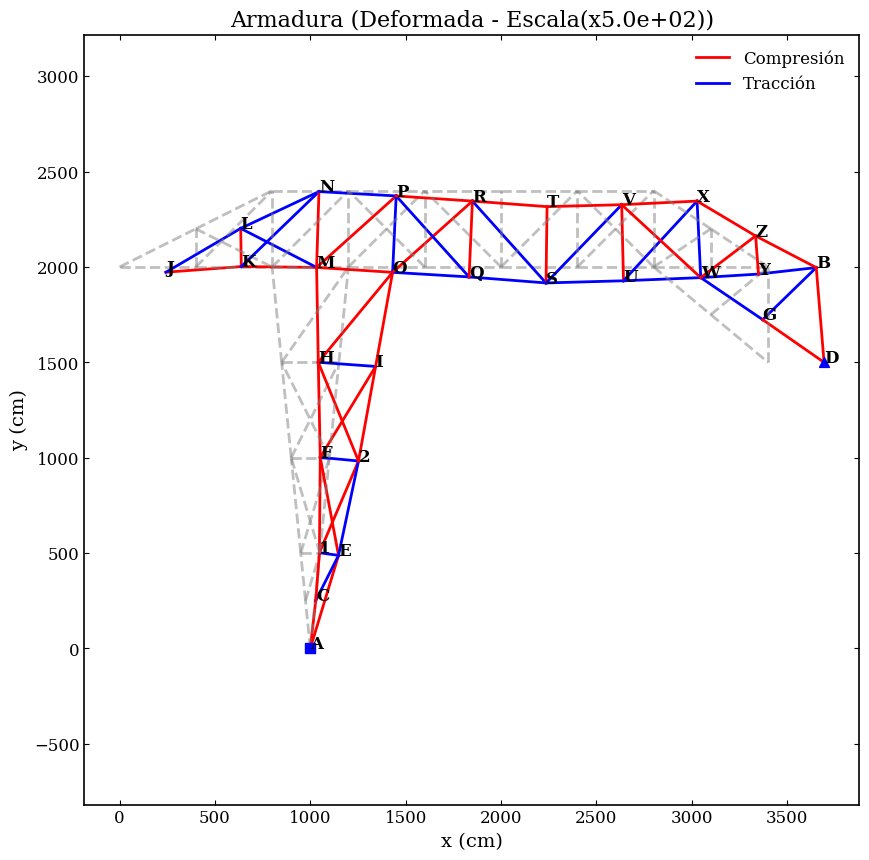

In [16]:
escala_def = 500
ut.grafico_desf(coords, barras, restricciones, dict_despl, escala_def, dict_normal,f"Armadura (Deformada - Escala(x{escala_def:.1e}))", f"x ({und_long})", f"y ({und_long})", True, True, True, (10,10)) # (Nodo, apoyo, Estr. Original)